In [43]:
import os,sys
import math
import numpy as np
import torch

import PIL
import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(torch.__version__)

1.9.0+cu102


## reference: [self-defined data generator](https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel)

In [20]:
class Dataset(torch.utils.data.Dataset):
    'Characterizes an image dataset for PyTorch'
    def __init__(self, list_files, labels, transform = None):
        'Initialization'
        self.labels = labels
        self.list_files = list_files
        self.transform = transform
    def __len__(self):
        'Denotes the total number of samples'
        return len(self.list_files)
    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        file_dir = self.list_files[index]

        # Load data and get label
        image = PIL.Image.open(file_dir)
        if self.transform:
            image = self.transform(image)
        X = image
        y = torch.tensor(self.labels[file_dir])

        return X, y

In [38]:
# split training set and validation set
data_dir = "/mnt/Storage/home/yuzhaowei/.keras/datasets/flower_photos"
daisy_images = [os.path.join((data_dir), "daisy") + "/" + i for i in os.listdir(os.path.join((data_dir), "daisy"))]
rose_images = [os.path.join((data_dir), "roses") + "/" + i for i in os.listdir(os.path.join((data_dir), "roses"))]
sunflowers_images = [os.path.join((data_dir), "sunflowers") + "/" + i for i in os.listdir(os.path.join((data_dir), "sunflowers"))]
samples = np.concatenate([np.random.choice(daisy_images, 100), np.random.choice(rose_images, 100), np.random.choice(sunflowers_images, 100)])
labels = {}
for sample in samples[0:100]:
    labels[sample] = "daisy"
for sample in samples[100:200]:
    labels[sample] = "rose"
for sample in samples[200:300]:
    labels[sample] = "sunflowers"

class Rescale():
    """Reize image in a sample to a given size"""
    def __call__(self, image):
        image_resize = np.array(T.Resize(size = (224, 224))(image))
        return(image_resize)
    
class ToTensor():
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, image):

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image_tensor = torch.from_numpy(image.transpose((2, 0, 1)))
        return(image_tensor)
composed = T.Compose([Rescale(), ToTensor()]) # composed two treatments for input images    
        
    
dataset = Dataset(samples, labels, transform = composed)
train_set, val_set = torch.utils.data.random_split(dataset, lengths = [int(300 * 0.7), int(300 * 0.3)])


3
torch.Size([64, 3, 224, 224])
3
torch.Size([64, 3, 224, 224])
3
torch.Size([64, 3, 224, 224])
3
torch.Size([64, 3, 224, 224])
3
torch.Size([64, 3, 224, 224])
3
torch.Size([64, 3, 224, 224])
3
torch.Size([64, 3, 224, 224])
3
torch.Size([64, 3, 224, 224])
3
torch.Size([64, 3, 224, 224])
3
torch.Size([64, 3, 224, 224])


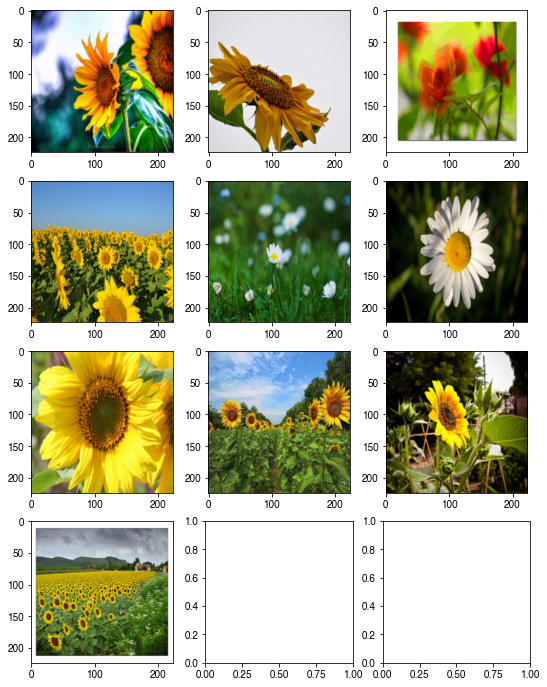

In [52]:
# generators
params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 6,
         'drop_last' : True # set to True to drop the last incomplete batch, if the dataset size is not divisible by the batch size.
         }
train_generator = torch.utils.data.DataLoader(train_set, **params)
val_generator = torch.utils.data.DataLoader(val_set, **params)

max_epochs = 10

fig, axs = plt.subplots(figsize = (9,12), nrows = 4, ncols = 3)
# loop over epoches
for epoch in range(max_epochs):
    # training
    loop = 0
    for local_batch, local_labels in train_generator:
        # print(local_batch)
        # print(local_labels)
        # [...] Model computations
        loop += 1
        continue
    print(loop)
    print(local_batch.shape)
    axs[epoch//3, epoch%3].imshow(np.array(local_batch[0]).transpose((1,2,0))) # convered to numpy image and showed in plot

In [18]:
train_set

In [ ]:
### an example to use GPU

partition = {'train': ['id-1', 'id-2', 'id-3'], 'validation': ['id-4']}
labels = {'id-1': 0, 'id-2': 1, 'id-3': 2, 'id-4': 1}

# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

# Parameters
params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 6}
max_epochs = 100

# Datasets
partition = # IDs
labels = # Labels

# Generators
training_set = Dataset(partition['train'], labels)
training_generator = torch.utils.data.DataLoader(training_set, **params)

validation_set = Dataset(partition['validation'], labels)
validation_generator = torch.utils.data.DataLoader(validation_set, **params)

# Loop over epochs
for epoch in range(max_epochs):
    # Training
    for local_batch, local_labels in training_generator:
        # Transfer to GPU
        local_batch, local_labels = local_batch.to(device), local_labels.to(device)

        # Model computations
        [...]

    # Validation
    with torch.set_grad_enabled(False):
        for local_batch, local_labels in validation_generator:
            # Transfer to GPU
            local_batch, local_labels = local_batch.to(device), local_labels.to(device)

            # Model computations
            [...]